# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ismail Abbas

ID: 55-7639

Tutorial: T-8

## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [183]:
df.describe()

,SeniorCitizen,tenure
count,7032.000000,7032.000000
mean,0.162400,32.421786
std,0.368844,24.545260
min,0.000000,1.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [185]:
#checking for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
customerID       56
TotalCharges    852
dtype: int64


In [186]:
# checking unique values to see if data is as expected
print("Unique values in each column:\n")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"{column}: Number of unique values {df[column].nunique()}: {unique_values}\n")

Unique values in each column:

customerID: Number of unique values 6976: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender: Number of unique values 2: ['Female' 'Male']

SeniorCitizen: Number of unique values 2: [0 1]

Partner: Number of unique values 2: ['Yes' 'No']

Dependents: Number of unique values 2: ['No' 'Yes']

tenure: Number of unique values 72: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]

PhoneService: Number of unique values 2: ['No' 'Yes']

MultipleLines: Number of unique values 3: ['No phone service' 'No' 'Yes']

InternetService: Number of unique values 3: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: Number of unique values 3: ['No' 'Yes' 'No internet service']

OnlineBackup: Number of unique values 3: ['Yes' 'No' 'No internet service']

DeviceProtection: Nu

In [187]:
#checking that each column is the right type
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object


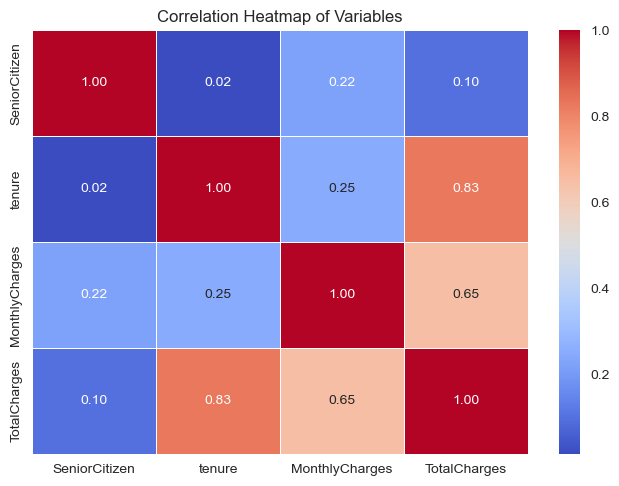

In [188]:
#reformating the numeric variables so htat they can be used in analysis
df['MonthlyCharges'] = df['MonthlyCharges'].replace('[\$/m]', '', regex=True).astype(float)
df['TotalCharges'] = df['TotalCharges'].replace('[\$]', '', regex=True).astype(float)
#inspecting he correlation between all the numeric variables
numerical_df = df.select_dtypes(include=['float64', 'int64']) #cuz non-numeric values cant be used in a heat map
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Variables")
plt.show()

## Data Cleaning

In [189]:
#since the column customerID wont be used in the model building section I wont drop the records to avoid losing data but 
#rather drop the column during data reduction

#checking the NA total charges for a pattern
df_original = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/main/data/telecom_churn.csv')
df_original['MonthlyCharges'] = df_original['MonthlyCharges'].replace('[\$/m]', '', regex=True).astype(float)
df_original['TotalCharges'] = df_original['TotalCharges'].replace('[\$]', '', regex=True).astype(float)
missing_total_charges = df_original[df_original['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'TotalCharges']]
print(missing_total_charges)
print(missing_total_charges.describe())
print(df_original[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())
#no pattern observed
#since the sd in total charges is large I am can either use monthlyCharges*Tenure as a substitute or the mean for each unique tenure value
#I used monthlyCharges*Tenure as a substitute
df['TotalCharges'] = df.apply(lambda row: row['tenure'] * row['MonthlyCharges'] if pd.isnull(row['TotalCharges']) else row['TotalCharges'], axis=1)

      tenure  MonthlyCharges  TotalCharges
17        71          106.70           NaN
19        21           90.05           NaN
23        58           59.90           NaN
31         2           95.50           NaN
37        46           74.80           NaN
...      ...             ...           ...
7006      51           20.65           NaN
7007       1           70.65           NaN
7014      18           95.05           NaN
7023      67          102.95           NaN
7026      72           21.15           NaN

[852 rows x 3 columns]
           tenure  MonthlyCharges  TotalCharges
count  852.000000      852.000000           0.0
mean    33.165493       64.575587           NaN
std     24.347554       29.672503           NaN
min      1.000000       18.800000           NaN
25%     10.000000       38.775000           NaN
50%     30.000000       70.150000           NaN
75%     56.250000       89.662500           NaN
max     72.000000      118.600000           NaN
            tenure  MonthlyC

In [190]:
#turning categorical variables into numeric
# first contract alone using label encoding due to its ordinal nature
from sklearn.preprocessing import LabelEncoder
#next the rest of the categorical values using one-hot encoding due to their non-ordinal nature
categorical_columns = ['Contract','MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'gender', 'SeniorCitizen', 'Partner', 
                       'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)
print(df_encoded.head())

   customerID  tenure  MonthlyCharges  TotalCharges  Contract_Month-to-month  \
0  7590-VHVEG       1           29.85         29.85                        1   
1  5575-GNVDE      34           56.95       1889.50                        0   
2  3668-QPYBK       2           53.85        108.15                        1   
3  7795-CFOCW      45           42.30       1840.75                        0   
4  9237-HQITU       2           70.70        151.65                        1   

   Contract_One year  Contract_Two year  MultipleLines_No  \
0                  0                  0                 0   
1                  1                  0                 1   
2                  0                  0                 1   
3                  1                  0                 0   
4                  0                  0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  ...  Partner_No  \
0                               1                  0  ...           0   
1     

In [191]:
#Data reduction
if 'customerID' in df_encoded.columns:
    df_encoded = df_encoded.drop('customerID', axis=1)#cuz it provides no info and we must decrease the volume of data as much 
                                                      #as possible
print(df_encoded.head())

   tenure  MonthlyCharges  TotalCharges  Contract_Month-to-month  \
0       1           29.85         29.85                        1   
1      34           56.95       1889.50                        0   
2       2           53.85        108.15                        1   
3      45           42.30       1840.75                        0   
4       2           70.70        151.65                        1   

   Contract_One year  Contract_Two year  MultipleLines_No  \
0                  0                  0                 0   
1                  1                  0                 1   
2                  0                  0                 1   
3                  1                  0                 0   
4                  0                  0                 1   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                               1                  0                    1   
1                               0                  0                  

In [207]:
#identify and remove outliers in monthly and total charges
#IQR for MonthlyCharges and TotalCharges
Q1_monthly = df_encoded['MonthlyCharges'].quantile(0.25)
Q3_monthly = df_encoded['MonthlyCharges'].quantile(0.75)
IQR_monthly = Q3_monthly - Q1_monthly
Q1_total = df_encoded['TotalCharges'].quantile(0.25)
Q3_total = df_encoded['TotalCharges'].quantile(0.75)
IQR_total = Q3_total - Q1_total

#lower and upper bounds for outliers
lower_bound_monthly = Q1_monthly - 1.5 * IQR_monthly
upper_bound_monthly = Q3_monthly + 1.5 * IQR_monthly
lower_bound_total = Q1_total - 1.5 * IQR_total
upper_bound_total = Q3_total + 1.5 * IQR_total

outliers_monthly = df_encoded[(df_encoded['MonthlyCharges'] < lower_bound_monthly) | (df_encoded['MonthlyCharges'] > upper_bound_monthly)]
outliers_total = df_encoded[(df_encoded['TotalCharges'] < lower_bound_total) | (df_encoded['TotalCharges'] > upper_bound_total)]
print(f"Number of outliers in 'MonthlyCharges': {len(outliers_monthly)}")
print(f"Number of outliers in 'TotalCharges': {len(outliers_total)}")
#no outliers found os no records are dropped

Number of outliers in 'MonthlyCharges': 0
Number of outliers in 'TotalCharges': 0


## Exploratory Data Analysis

**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

Most correlated attributes with churn:
Churn_Yes                                  1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen_1                            0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes         

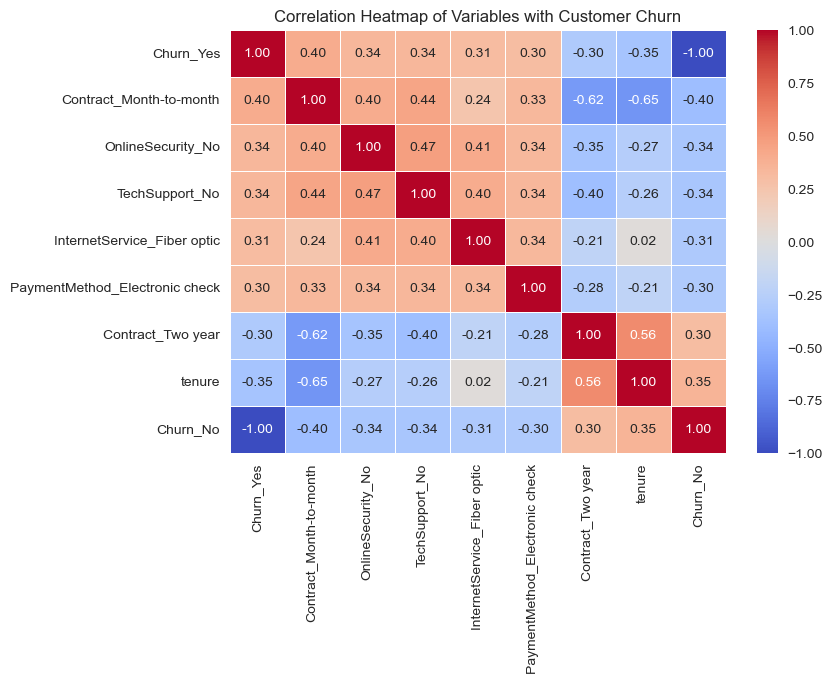

In [193]:
q1_df = df_encoded
correlation_matrix = q1_df.corr()
correlation_with_churn = correlation_matrix['Churn_Yes'].sort_values(ascending=False)
print("Most correlated attributes with churn:")
print(correlation_with_churn)
# due to the large amount of columns it is difficult to interpret the heat map so I will limit it to the strongest correlations
correlation_matrix_filtered = q1_df[['Churn_Yes','Contract_Month-to-month','OnlineSecurity_No','TechSupport_No','InternetService_Fiber optic',
                                     'PaymentMethod_Electronic check','Contract_Two year','tenure','Churn_No']].corr()
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Variables with Customer Churn")
plt.show()

**Answer for Q1**: assuming that the question is asking for both positive and negative correlations, as you can see above the top 3 most correlated variables are Contract_Month-to-month, tenure and OnlineSecurity_No.

**Q2: Which payment method has the highest churn rate?**

**Visualization**

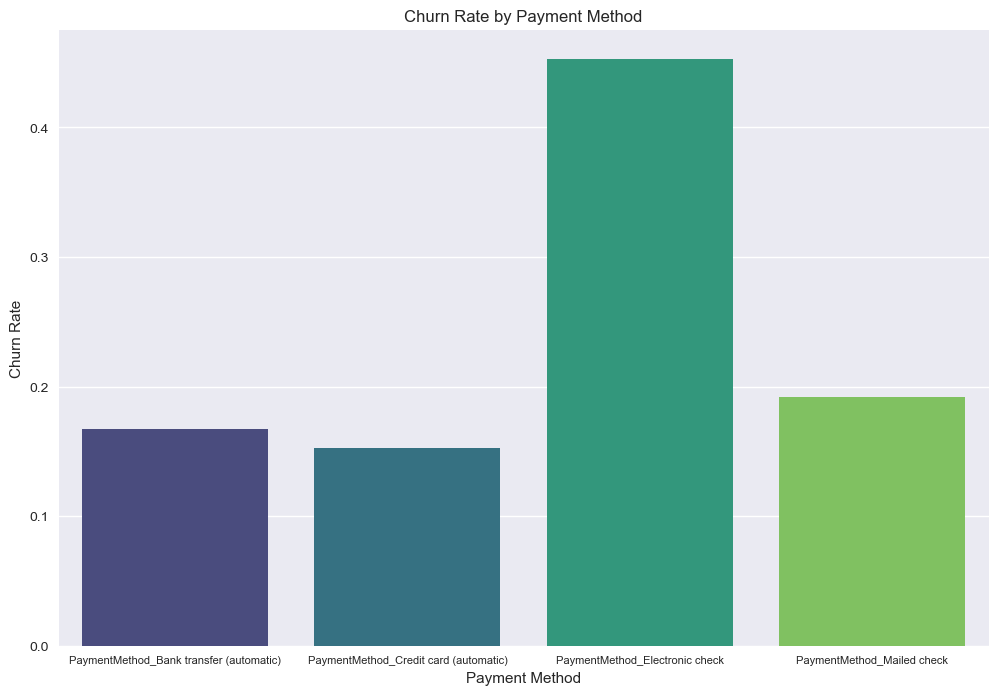

Churn Rate for PaymentMethod_Electronic check is: 0.4528541226215645
Churn Rate for PaymentMethod_Bank transfer (automatic) is: 0.16731517509727625
Churn Rate for PaymentMethod_Credit card (automatic) is: 0.1525312294543064
Churn Rate for PaymentMethod_Mailed check is: 0.19201995012468828


In [194]:
# see the correlation between churn and all the types of payment methods
# need to put them in an array because of one-hot encoding
payment_methods = ['PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 
                   'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
churn_rates = {}
for method in payment_methods:
    churn_rates[method] = df_encoded[df_encoded[method] == 1]['Churn_Yes'].mean()  
churn_rates_df = pd.DataFrame(list(churn_rates.items()), columns=['PaymentMethod', 'ChurnRate'])
plt.figure(figsize=(12, 8))
sns.barplot(x='PaymentMethod', y='ChurnRate', data=churn_rates_df, palette="viridis")
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Payment Method")
plt.xticks(fontsize=8)
plt.show()
electronic_check_churn = churn_rates['PaymentMethod_Electronic check']
bank_transfer_check_churn = churn_rates['PaymentMethod_Bank transfer (automatic)']
credit_card_check_churn = churn_rates['PaymentMethod_Credit card (automatic)']
mailed_check_check_churn = churn_rates['PaymentMethod_Mailed check']

print("Churn Rate for PaymentMethod_Electronic check is:", electronic_check_churn)
print("Churn Rate for PaymentMethod_Bank transfer (automatic) is:", bank_transfer_check_churn)
print("Churn Rate for PaymentMethod_Credit card (automatic) is:", credit_card_check_churn)
print("Churn Rate for PaymentMethod_Mailed check is:", mailed_check_check_churn)

**Answer for Q2**: as shown above PaymentMethod_Electronic check is the payment method with thee highest churn rate of 45.29%

**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

Churn percentiles for tenure:
0.25     2.0
0.50    10.0
0.75    29.0
Name: tenure, dtype: float64


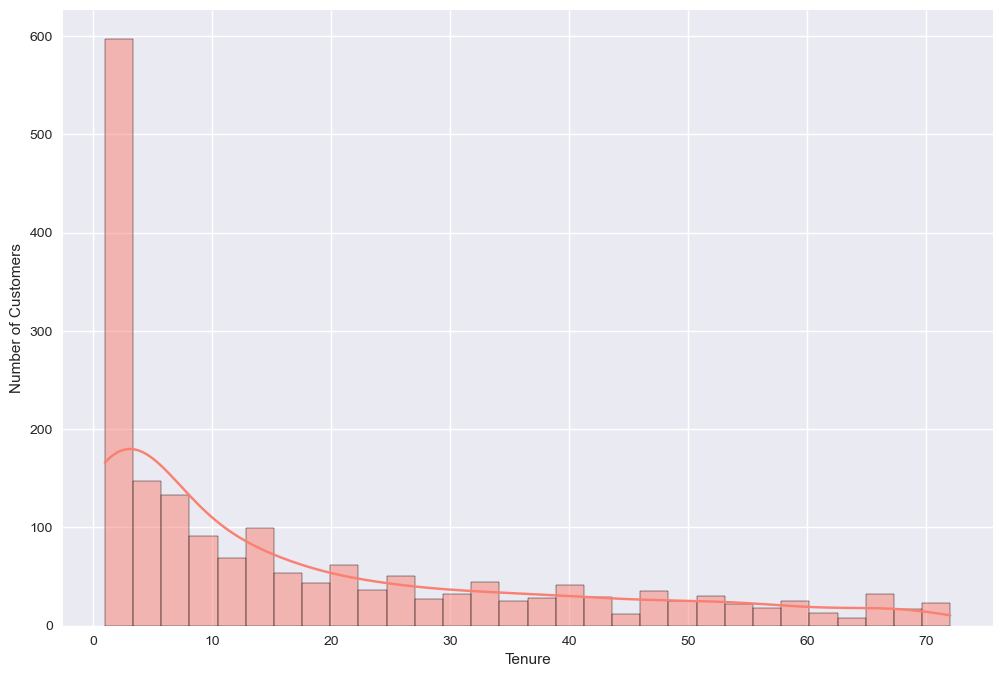

Top 5 most common tenures after which customers churn are:
1    380
2    123
3     94
4     83
5     64
Name: tenure, dtype: int64


In [195]:
#get only those who have churned
churned_customers = df_encoded[df_encoded['Churn_Yes'] == 1]
# show the percentiles 25%, 50%, and 75%
percentiles = churned_customers['tenure'].quantile([0.25, 0.50, 0.75])
print(f"Churn percentiles for tenure:\n{percentiles}")
plt.figure(figsize=(12, 8))
sns.histplot(churned_customers['tenure'], bins=30, kde=True, color='salmon')
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.show()
tenure_counts = churned_customers['tenure'].value_counts()
# Gets the top 5 most common tenure values after which customers churn
top_5_churn_tenure = tenure_counts.head(5)
print("Top 5 most common tenures after which customers churn are:")
print(top_5_churn_tenure)

**Answer for Q3**: as the percentiles show 25% of churners did so within 2 months, 50% did so within 10 months and 75% did so within 29 months, the historam after shows, churn rate and tenure are inversely proportional and as the print statement for mode after it shows that customers most commonly churn after 1 month.

## Data Preparation for Modelling

In [213]:
# data imputaion,*some* reduction, converting categorical variables and removal of outliers have already been done above
#removing redundant columns left after one-hot encoding and low correlation variables
columns_to_drop = [#the one-hot encoding redundancies
                   'Contract_Month-to-month', 'InternetService_No', 'OnlineSecurity_Yes', 'TechSupport_Yes','SeniorCitizen_0', 
                   'Partner_No', 'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No', 'Churn_No',
                  #the low correlation ones
                   'StreamingTV_Yes','StreamingMovies_Yes','MultipleLines_Yes','PhoneService_Yes','gender_Female','gender_Male',
                   'PhoneService_No', 'MultipleLines_No phone service', 'MultipleLines_No','DeviceProtection_Yes',
                   'OnlineBackup_Yes','PaymentMethod_Mailed check'
                  ]
existing_columns_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]# to avoid errors
df_encoded = df_encoded.drop(columns=existing_columns_to_drop, axis=1)
print(df_encoded.info())
#standardizing nor normalizing data are needed because this is a decision tree

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Contract_One year                        7032 non-null   uint8  
 4   Contract_Two year                        7032 non-null   uint8  
 5   InternetService_DSL                      7032 non-null   uint8  
 6   InternetService_Fiber optic              7032 non-null   uint8  
 7   OnlineSecurity_No                        7032 non-null   uint8  
 8   OnlineSecurity_No internet service       7032 non-null   uint8  
 9   OnlineBackup_No                          7032 non-null   uint8  
 10  OnlineBackup_No internet service         7032 no

## Modelling

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_encoded.drop(columns=['Churn_Yes']) 
y = df_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7469793887704336
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1033
           1       0.52      0.56      0.54       374

    accuracy                           0.75      1407
   macro avg       0.68      0.69      0.68      1407
weighted avg       0.75      0.75      0.75      1407

Confusion Matrix:
 [[842 191]
 [165 209]]


### Tree Visualization

In [198]:
!pip install graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
from sklearn.model_selection import train_test_split
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Evaluation

In [199]:
#The model has an accuracy of 74.7%, this means it correctly predicts the target class about 75% of the time. 
#For class 0/No churn, it does well with 84% precision and 82% recall, but for class 1/Yes churn it does badly 
#with 52% precision and 56% recall. The macro average F1-score is 0.68, and the weighted average F1-score is 0.75, reflecting 
#better performance for the majority class. The confusion matrix shows that the model is better at predicting the 
#0 class/No churn

#the rule for one of the leaves is If OnlineSecurity_No <= 0.50 and If Contract_Two year <= 0.50 and If Contract_One year <= 0.50 
#and If MonthlyCharges <= 91.45 and If tenure <= 1.50 and If PaperlessBilling_Yes <= 0.50 and If PaymentMethod_Credit card 
#(automatic) <= 0.50 and If MonthlyCharges <= 19.23 then the customer will NOT churn

In [210]:
#found this on stack overflow since navigating the tree is difficult
from sklearn.tree import _tree
def print_tree_rules(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined" for i in tree_.feature]    
    def recurse(node, depth=0):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            # Print decision rule for current node
            print(f"{'  ' * depth}If {feature_name[node]} <= {tree_.threshold[node]:.2f}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{'  ' * depth}Else:")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{'  ' * depth}Predict: {tree_.value[node]}")    
    recurse(0)
print_tree_rules(tree_clf, X.columns)

If OnlineSecurity_No <= 0.50:
  If Contract_Two year <= 0.50:
    If Contract_One year <= 0.50:
      If MonthlyCharges <= 91.45:
        If tenure <= 1.50:
          If PaperlessBilling_Yes <= 0.50:
            If PaymentMethod_Credit card (automatic) <= 0.50:
              If TotalCharges <= 19.23:
                Predict: [[5. 0.]]
              Else:
                If PaymentMethod_Electronic check <= 0.50:
                  If TotalCharges <= 19.52:
                    If TotalCharges <= 19.43:
                      Predict: [[0. 2.]]
                    Else:
                      If Partner_Yes <= 0.50:
                        If TotalCharges <= 19.48:
                          Predict: [[1. 0.]]
                        Else:
                          Predict: [[0. 1.]]
                      Else:
                        Predict: [[0. 1.]]
                  Else:
                    If MonthlyCharges <= 65.50:
                      If SeniorCitizen_1 <= 0.50:
                  

## Bonus (Optional)

In [201]:
#Ill be doing logistic regression model
df_logistic = df_encoded
#im assuming data analysis,cleaning and reduction do not need to be written and explained again since it has already been 
#done above

In [202]:
#columns_to_drop = ['Contract_Month-to-month','MultipleLines_Yes', 'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 
 #                  'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 
  #                 'gender_Female', 'PaymentMethod_Mailed check', 'SeniorCitizen_0', 'Partner_No', 
   #                'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No', 'Churn_No']
existing_columns_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]# to avoid errors
df_logistic = df_logistic.drop(columns=existing_columns_to_drop, axis=1)




#data cleaning, reduction and transforming are the same
#standardizing or normalizing data ARE needed because this is a logistic regression model
#ive chosen standardization since logistic regression assumes a linear relation and standardization helps achieve a 
#roughly standard normal distribution with a mean of 0 and variance of 1
from sklearn.preprocessing import StandardScaler
numerical_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_logistic[numerical_variables] = StandardScaler().fit_transform(df_logistic[numerical_variables])
print(df_logistic.head())

     tenure  MonthlyCharges  TotalCharges  Contract_One year  \
0 -1.280248       -1.161694     -0.994299                  0   
1  0.064303       -0.260878     -0.173745                  1   
2 -1.239504       -0.363923     -0.959750                  0   
3  0.512486       -0.747850     -0.195256                  1   
4 -1.239504        0.196178     -0.940556                  0   

   Contract_Two year  InternetService_DSL  InternetService_Fiber optic  \
0                  0                    1                            0   
1                  0                    1                            0   
2                  0                    1                            0   
3                  0                    1                            0   
4                  0                    0                            1   

   OnlineSecurity_No  OnlineSecurity_No internet service  OnlineBackup_No  \
0                  1                                   0                0   
1               

In [203]:
from sklearn.linear_model import LogisticRegression
X = df_logistic.drop('Churn_Yes', axis=1)
y = df_logistic['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

#model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7910447761194029
Confusion Matrix:
[[914 119]
 [175 199]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



In [204]:
#The model has an accuracy of 79.1%, this means it correctly predicts the target class about 79% of the time. 
#For class 0/No churn, it does well with 84% precision and 88% recall, but for class 1/Yes churn it does worse 
#with 63% precision and 53% recall. The macro average F1-score is 0.72, and the weighted average F1-score is 0.79, reflecting 
#better performance for the majority class. The confusion matrix shows that the model is better at predicting the 
#0 class/No churn

#Over all i would choose the logistic regression model because it balances performance across both classes better, 
#especially for identifying churn yes/class 1, which I believe is more important in churn prediction. While the 
#decision tree has a slightly better recall for churn yes/class 1, it does so at the cost of precision, making it less 
#reliable for predicting churn accurately.